# Analisis Correlacion PCA y TSNE
Evaluar la correlación entre variables, aplicar reducción de dimensionalidad (PCA) y visualización no lineal (t-SNE) para detectar agrupaciones, redundancias o relaciones ocultas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Cargar y preparar
df = pd.read_csv('datasets/ventas.csv')
df['fecha'] = pd.to_datetime(df['fecha'])
df['categoria'] = df['categoria'].map({'A': 'Alta', 'B': 'Media', 'C': 'Baja'})

### Correlación entre variables

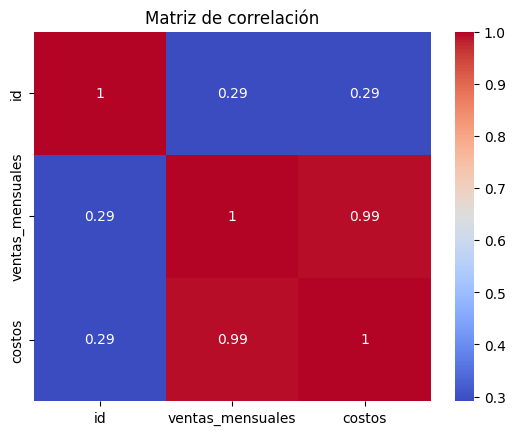

In [3]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### Selección y estandarización de datos numéricos

In [4]:
X = df[['ventas_mensuales', 'costos']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Aplicación de PCA (reducción lineal)

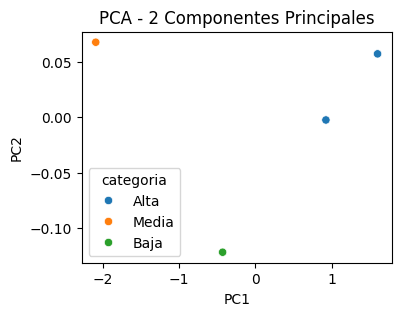

Varianza explicada por cada componente: [0.99716712 0.00283288]


In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(4, 3))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['categoria'])
plt.title('PCA - 2 Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

### Aplicación de t-SNE (reducción no lineal)

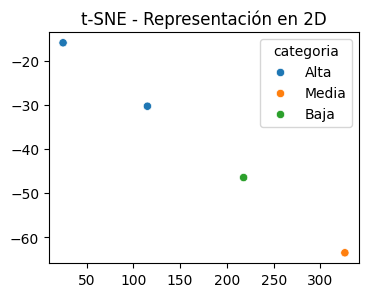

In [6]:
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(4, 3))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['categoria'])
plt.title('t-SNE - Representación en 2D')
plt.show()

### Visualización de la varianza explicada por PCA

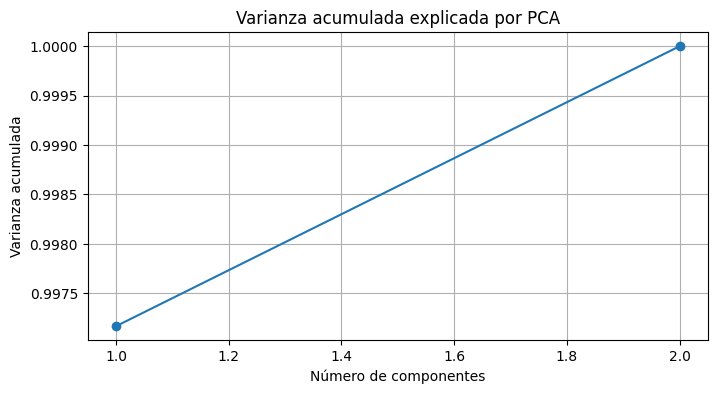

In [7]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza acumulada explicada por PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

### Comparar PCA vs t-SNE lado a lado